# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [90]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [91]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []
units = 'metric'

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json=city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json['coord']['lat']
        city_lng = city_weather_json['coord']['lon']
        city_max_temp = city_weather_json['main']['temp_max']
        city_humidity = city_weather_json['main']['humidity']
        city_clouds = city_weather_json['clouds']['all']
        city_wind = city_weather_json['wind']['speed']
        city_country = city_weather_json['sys']['country']
        city_date = city_weather_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | ta`u
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | binjai
Processing Record 7 of Set 1 | olonkinbyen
Processing Record 8 of Set 1 | pacific grove
Processing Record 9 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 10 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | guntakal junction
Processing Record 16 of Set 1 | klyuchi
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | anadyr
Processing Record 19 of Set 1 | newman
Processing Record 20 of Set 1 | whitehorse
Processing Record 21 of Set

In [92]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [93]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,9.49,58,100,3.74,RU,1722818776
1,ta`u,-14.2336,-169.5144,26.86,64,100,1.90,AS,1722818777
2,albany,42.6001,-73.9662,24.47,78,0,0.89,US,1722818748
3,port-aux-francais,-49.3500,70.2167,1.82,67,10,7.32,TF,1722818779
4,longyearbyen,78.2186,15.6401,8.91,87,40,4.63,SJ,1722818780


In [94]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [95]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,9.49,58,100,3.74,RU,1722818776
1,ta`u,-14.2336,-169.5144,26.86,64,100,1.90,AS,1722818777
2,albany,42.6001,-73.9662,24.47,78,0,0.89,US,1722818748
3,port-aux-francais,-49.3500,70.2167,1.82,67,10,7.32,TF,1722818779
4,longyearbyen,78.2186,15.6401,8.91,87,40,4.63,SJ,1722818780


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

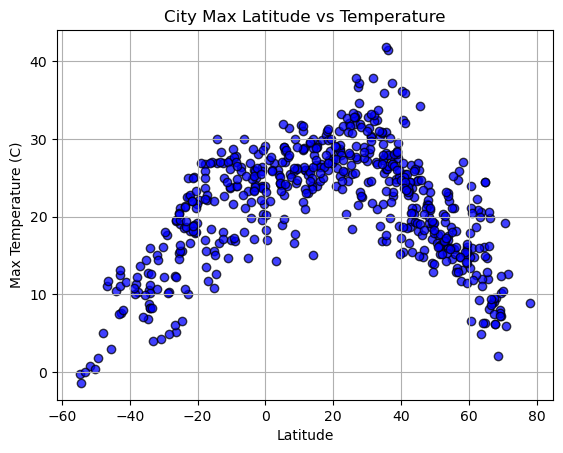

In [96]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker="o", 
            facecolors='blue', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("City Max Latitude vs Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

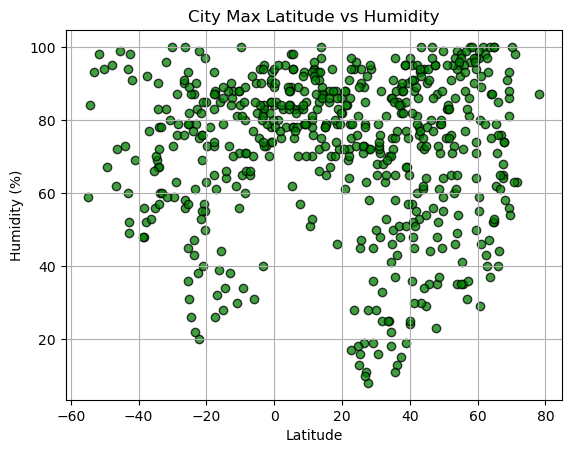

In [97]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker="o", 
            facecolors='green', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Max Latitude vs Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

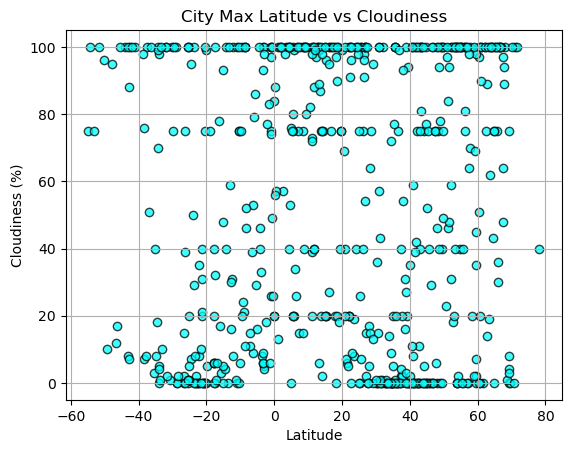

In [98]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker="o", 
            facecolors='aqua', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Max Latitude vs Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

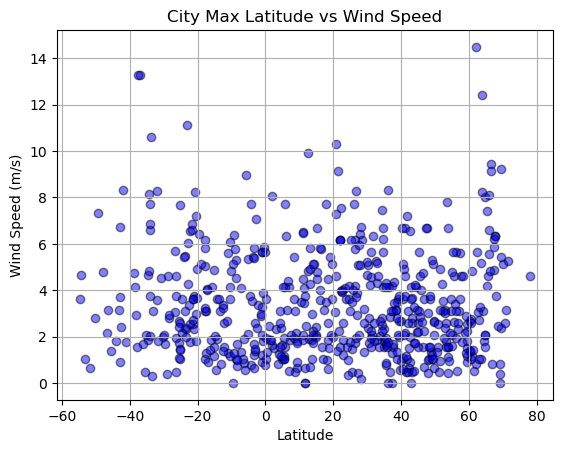

In [99]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker="o", 
            facecolors='blue', edgecolors='black', alpha=0.5)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title("City Max Latitude vs Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [100]:
# Define a function to create Linear Regression plots
import scipy.stats as st

In [101]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0),:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,9.49,58,100,3.74,RU,1722818776
2,albany,42.6001,-73.9662,24.47,78,0,0.89,US,1722818748
4,longyearbyen,78.2186,15.6401,8.91,87,40,4.63,SJ,1722818780
5,binjai,3.6001,98.4854,25.97,78,100,0.83,ID,1722818781
6,olonkinbyen,70.9221,-8.7187,5.99,98,100,3.16,SJ,1722818782


In [102]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ta`u,-14.2336,-169.5144,26.86,64,100,1.90,AS,1722818777
3,port-aux-francais,-49.3500,70.2167,1.82,67,10,7.32,TF,1722818779
8,hermanus,-34.4187,19.2345,8.78,67,70,8.16,ZA,1722818787
9,grytviken,-54.2811,-36.5092,-1.39,84,100,4.67,GS,1722818788
11,waitangi,-43.9535,-176.5597,10.46,73,100,1.79,NZ,1722818791


###  Temperature vs. Latitude Linear Regression Plot

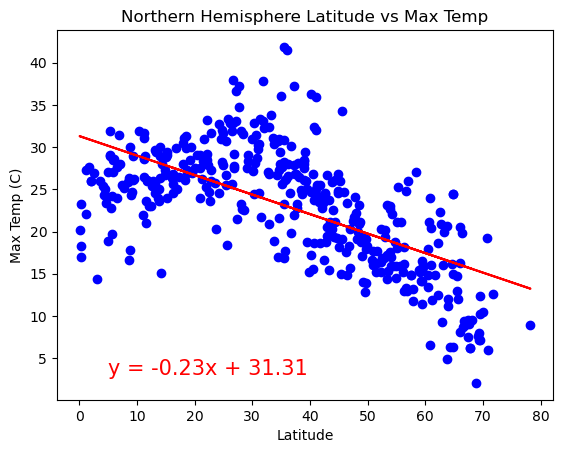

The r^2-value is 0.40653201253604937


In [113]:
# Linear regression on Northern Hemisphere
correlation = st.pearsonr(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'].astype(float), northern_hemi_df['Max Temp'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], color="blue",marker="o")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title('Northern Hemisphere Latitude vs Max Temp')
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(5,3),fontsize=15,color="red")
plt.show()
print(f"The r^2-value is {rvalue**2}")

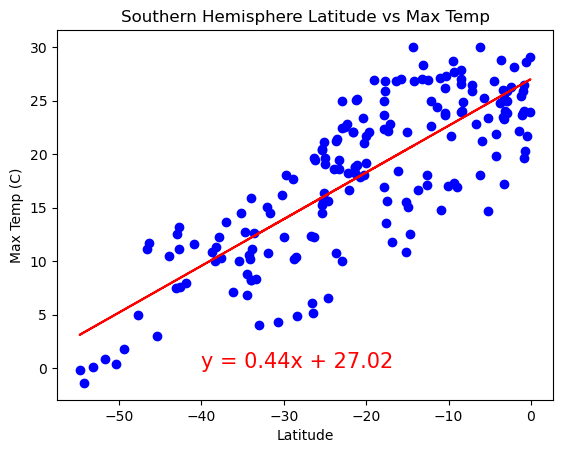

The r^2-value is 0.6502621249358291


In [112]:
# Linear regression on Southern Hemisphere
correlation = st.pearsonr(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'].astype(float), southern_hemi_df['Max Temp'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], color="blue",marker="o")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title('Southern Hemisphere Latitude vs Max Temp')
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-40,0),fontsize=15,color="red")
plt.show()
print(f"The r^2-value is {rvalue**2}")

**Discussion about the linear relationship:** Based on the R^2 value, the Latitude a city is on can be a moderately useful predictor of the cities in the Southern Hemisphere's max temperature.  In the Northern Hemisphere, the use of latitude to predict max temperature is weaker.  The R^2 value in the Southern Hemisphere is 0.65 vs 0.41 in the Northern Hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

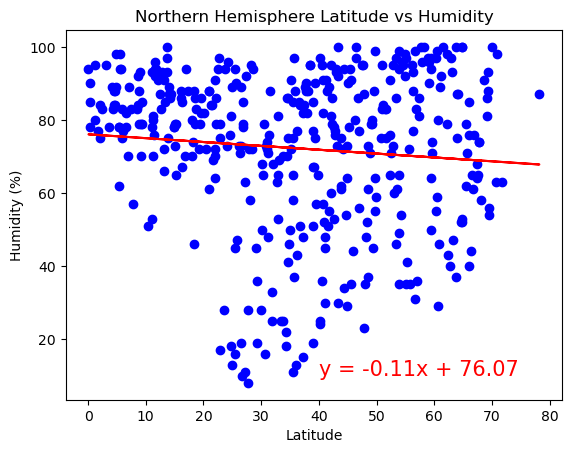

The r^2-value is 0.008658395155729895


In [105]:
# Northern Hemisphere
correlation = st.pearsonr(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'].astype(float), northern_hemi_df['Humidity'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], color="blue",marker="o")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('Northern Hemisphere Latitude vs Humidity')
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.show()
print(f"The r^2-value is {rvalue**2}")

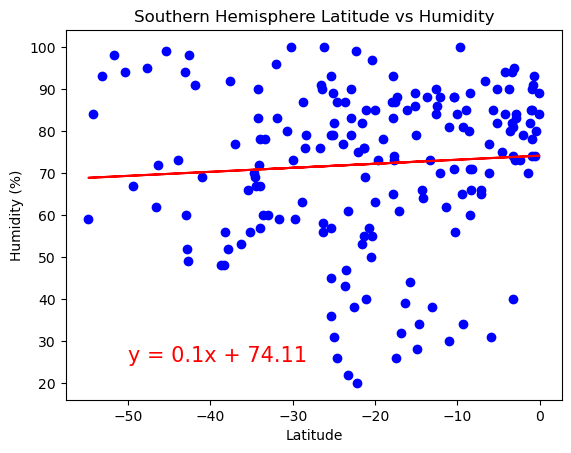

The r^2-value is 0.00499506372528145


In [111]:
# Southern Hemisphere
correlation = st.pearsonr(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'].astype(float), southern_hemi_df['Humidity'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], color="blue",marker="o")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('Southern Hemisphere Latitude vs Humidity')
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.show()
print(f"The r^2-value is {rvalue**2}")

**Discussion about the linear relationship:** The R^2 value for Latitude vs Humidity in both the Northern and Southern Hemisphere are very weak, each less than 0.01.  A cities latitude is not a good predictor of what it's Humidity would be.

### Cloudiness vs. Latitude Linear Regression Plot

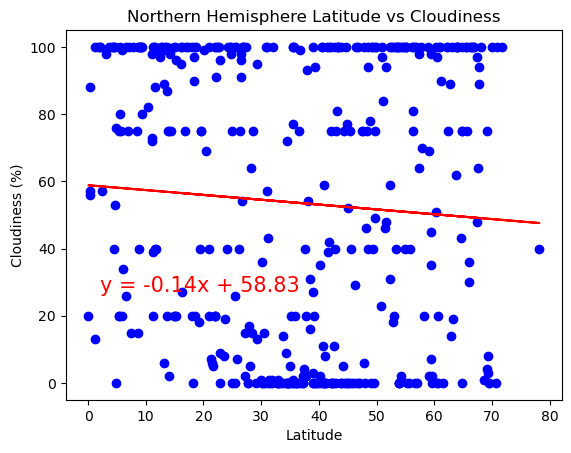

The r^2-value is 0.004389987668704404


In [115]:
# Northern Hemisphere
correlation = st.pearsonr(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'].astype(float), northern_hemi_df['Cloudiness'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], color="blue",marker="o")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('Northern Hemisphere Latitude vs Cloudiness')
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(2,27),fontsize=15,color="red")
plt.show()
print(f"The r^2-value is {rvalue**2}")

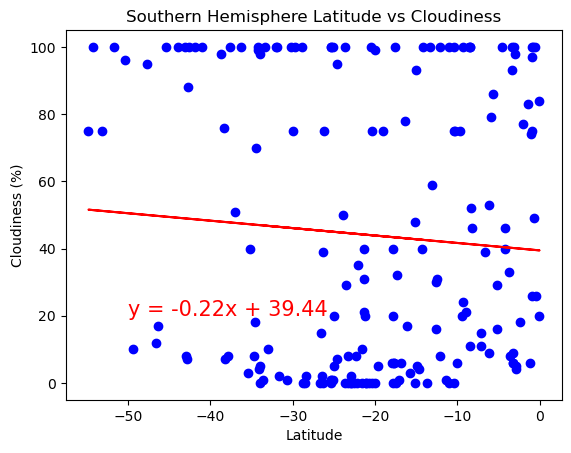

The r^2-value is 0.005491764609989976


In [116]:
# Southern Hemisphere
correlation = st.pearsonr(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'].astype(float), southern_hemi_df['Cloudiness'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], color="blue",marker="o")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('Southern Hemisphere Latitude vs Cloudiness')
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.show()
print(f"The r^2-value is {rvalue**2}")

**Discussion about the linear relationship:** The R^2 value for Latitude vs Cloudiness in both the Northern and Southern Hemisphere are very weak, each less than 0.01.  A cities latitude is not a good predictor of what it's Cloudiness would be.

### Wind Speed vs. Latitude Linear Regression Plot

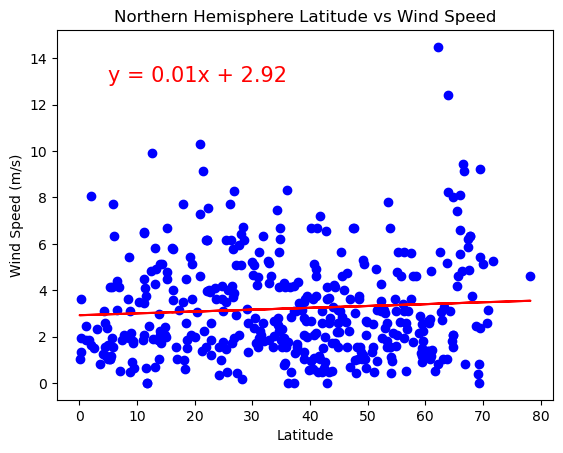

The r^2-value is 0.004906754872109843


In [109]:
# Northern Hemisphere
correlation = st.pearsonr(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'].astype(float), northern_hemi_df['Wind Speed'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], color="blue",marker="o")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title('Northern Hemisphere Latitude vs Wind Speed')
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(5,13),fontsize=15,color="red")
plt.show()
print(f"The r^2-value is {rvalue**2}")

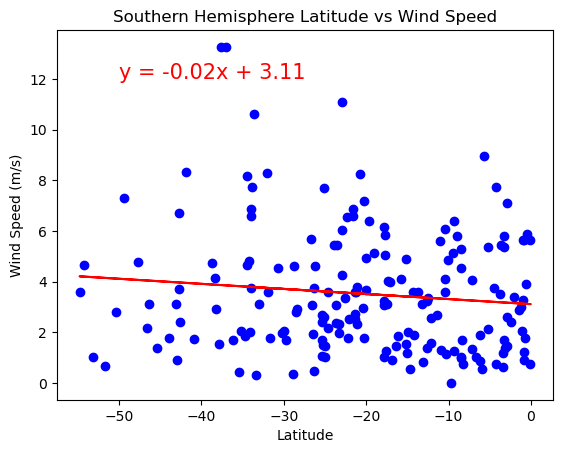

The r^2-value is 0.012809119013379805


In [110]:
# Southern Hemisphere
correlation = st.pearsonr(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'].astype(float), southern_hemi_df['Wind Speed'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], color="blue",marker="o")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title('Southern Hemisphere Latitude vs Wind Speed')
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
plt.show()
print(f"The r^2-value is {rvalue**2}")

**Discussion about the linear relationship:** The R^2 value for Latitude vs Wind Speed in both the Northern and Southern Hemisphere are very weak, each less than 0.01.  A cities latitude is not a good predictor of what it's Wind Speed would be.